num of steps = 31
num of steps = 11


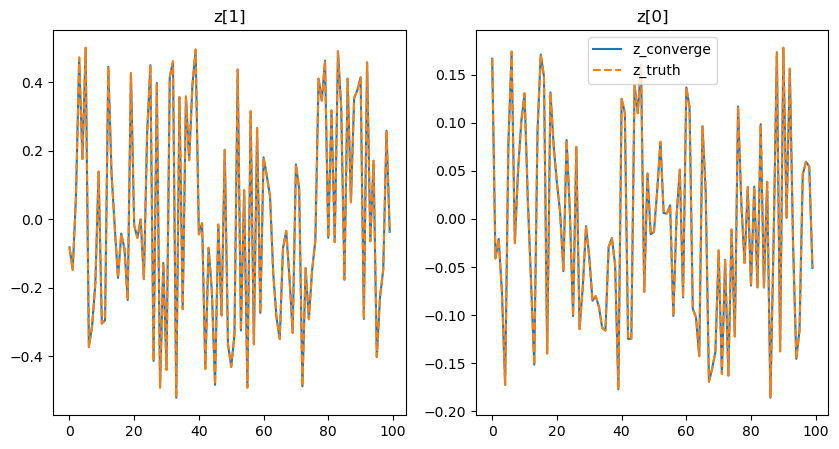

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from rank1_Cp import rankOneCP_SymmetricT3

n = 100 
L = 80
A = 0.0 
z = np.random.random([2, n])-0.5
ws = [1, 3]
Ai = [] 
for i in range(2):
   z[i] = ws[i] * z[i] / np.linalg.norm(z[i]) + 0 

for i in range(2):
   Ai.append(np.tensordot(np.tensordot(z[i], z[i], axes=0), z[i], axes=0))
   A = A + Ai[i]


model = rankOneCP_SymmetricT3(A)
z_best_1, loss = model.run()
print(f'num of steps = {len(loss)}')

model.update_A()
z_best_0, loss = model.run()
print(f'num of steps = {len(loss)}')

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(z_best_1,label='z_converge')
plt.plot(z[1],'--',label='z_truth')

plt.title('z[1]')
plt.subplot(122)
plt.plot(z_best_0,label='z_converge')
plt.plot(z[0],'--',label='z_truth')
plt.title('z[0]')
plt.legend()